2022-12-08 23:54:09.606 No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
D:\Temp\pythonProject4\venv\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

D:\Temp\pythonProject4\venv\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

D:\Temp\pythonProject4\venv\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

D:\Temp\pythonProject4\venv\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

D:\Temp\pythonProject4\venv\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be

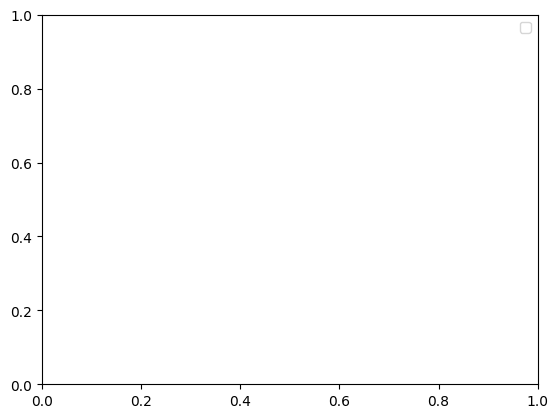

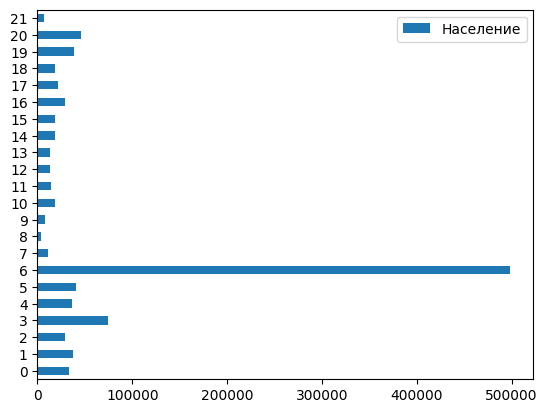

In [80]:

import branca
import folium
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import numpy as np
import altair as alt
import jmespath, json



import matplotlib

from folium.plugins import MousePosition

from folium.features import GeoJsonTooltip, GeoJsonPopup



def init_json_kld():
    geojson_kld_sub = gpd.read_file(r"./admin_level_6.geojson", encoding="utf8")
    geojson_kld_sub = geojson_kld_sub.loc[geojson_kld_sub['addr:region'] == "Калининградская область"]
    return geojson_kld_sub



def init_data_kld():
    data_kld = pd.read_csv('./январь_2021_г_,_23110000100030200002_Численность_постоянного_населения_на_1_января.csv',
                           encoding='cp1251')
    data_kld = data_kld.loc[data_kld['Городские округа:'] != 'Заглушка']
    return data_kld



def init_natural_move():
    data_kld = pd.read_csv('./Данные csv/КалининградСтат - Данные - Естест. движение насел.csv')

    return data_kld


async def get_my_dict_string(feature):
    v1 = feature["properties"]['name']


    bra = init_natural_move().set_index('Городские округа:').columns.tolist()
    data_loc = pd.melt(init_natural_move(), id_vars='Городские округа:', value_vars=bra)
    for i in data_loc['Городские округа:']:
        data_loc = data_loc.loc[data_loc['Городские округа:'] == f'{v1}']

    chart = alt.Chart(data_loc).mark_line().encode(
     x = 'variable',
     y = 'value',
     # color = 'Variable'
    )
    char2 = json.loads(chart.to_json(indent=None))
    # popup = folium.Popup(max_width=300, html="Пидорас")
    # ka = folium.features.VegaLite(char2, height=300, width=300).add_to(popup)



    feature = feature["properties"]['Ест_движ_нас']
    my_td = '''<!DOCTYPE html><html><head>
    <script src="https://cdn.jsdelivr.net/npm/vega@{vega_version}"></script>
  <script src="https://cdn.jsdelivr.net/npm/vega-lite@{vegalite_version}"></script>
  <script src="https://cdn.jsdelivr.net/npm/vega-embed@{vegaembed_version}"></script>
    </head>'''
    my_td += f'''<Body style="background-color:grey;width: 302px">
     <h3 style="color:rgb(236, 77, 77);background-color: oldlace;bottom:0px;padding-bottom:0px;margin-bottom: 0px; margin-top: 5px; margin-left:2px;width: 298px;">Естесственное </br> движение населения</h1>
     <table style="margin-left:0px;">
        <tbody>
             <tr><td style= background-color:oldlace;width:100px> <span style= columns:#343434;3434>Муниципальное образование:</span> </td>
                <td style= background-color:oldlace;width:200px> <span style= color:#343434> {v1}</span> </tr>
        '''
    for i in feature:
        my_td += f'''<tr><td style= background-color:oldlace;width:100px> <span style= columns:#343434;3434>{i} г.:</span> </td>
                <td style= background-color:oldlace;width:200px> <span style= color:#343434> {f'Прибыло {feature[i]} человек' if int(feature[i]) >= 0 else f'Покинуло {(int(feature[i]) * (-1))} человек'}</span> </tr>'''

    my_td += f'''</tbody></table>'''


    my_td += '''
    <div id="vis1"></div>
    <script type="text/javascript">
        vegaEmbed('#vis1', {spec1}).catch(console.error);
    </script>'''

    my_td += f'''</Body>'''

    with open('charts.html', 'w') as f:
        f.write(my_td.format(
        vega_version=alt.VEGA_VERSION,
        vegalite_version=alt.VEGALITE_VERSION,
        vegaembed_version=alt.VEGAEMBED_VERSION,
        spec1=char2
    ))




    return my_td



geojson_kld_sub = init_json_kld()

data_kld = init_data_kld()
data_kld['%Населения'] = [round(i * 100 / max(data_kld['Население']), 4) for i in data_kld['Население']]
data_kld['Население'] = [np.float_(i) for i in data_kld['Население']]
data_kld_ind = data_kld.set_index('Городские округа:')

kld_people_natural_moving = init_natural_move()
kld_people_natural_moving_ind = kld_people_natural_moving.set_index('Городские округа:')

kld_people_natural_moving_ind = kld_people_natural_moving_ind.astype('str')
bra = kld_people_natural_moving_ind.columns.tolist()

data_loc = pd.melt(kld_people_natural_moving, id_vars='Городские округа:', value_vars=bra)

for i in data_loc['Городские округа:']:
    data_loc = data_loc.loc[data_loc['Городские округа:'] == 'Гурьевский']

matplotlib.pyplot.legend()
white_tile = branca.utilities.image_to_url([[1, 1], [1, 1]])

Kaliningrad_map = folium.Map(
    location=[54.709300, 20.5082600],
    zoom_start=9,
    maxBounds=[[54.3, 19.4], [55.40, 22.9]],
    tiles=white_tile,
    attr='white tile',
)

formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

################################################################
################################################################
################################################################
################################################################

Kaliningrad_map.add_child(mouse_position)


myscale = (data_kld['%Населения'].quantile((0.0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.89, 0.98, 1.0))).tolist()

coropleth = folium.Choropleth(
    geo_data=geojson_kld_sub,
    name="Население",
    data=data_kld,
    columns=['Городские округа:', '%Населения'],
    key_on='properties.name',
    nan_fill_color='darkblue',
    nan_fill_opacity=0.3,
    threshold_scale=myscale,
    bins=3,
    fill_color='PuBuGn',  # 'YlGn',
    fill_opacity=0.7,
    line_opacity=0.4,
    legend_name='Население',
    smooth_factor=0,
    highlight=True
).add_to(Kaliningrad_map)

for key in coropleth._children:
    if key.startswith('color_map'):
        del (coropleth._children[key])

for s in coropleth.geojson.data['features']:
    s['properties']['population'] = data_kld_ind.loc[s['properties']['name'], 'Население']

people_natural_moving = folium.Choropleth(
    geo_data=geojson_kld_sub,
    name="%Населения",
    data=kld_people_natural_moving,
    columns=['Городские округа:', '2012'],
    key_on='properties.name',
    nan_fill_color='darkblue',
    nan_fill_opacity=0.3,
    # threshold_scale=myscale,
    bins=3,
    fill_color='PuBuGn',  # 'YlGn',
    fill_opacity=0.7,
    line_opacity=0.4,
    # legend_name='%Населения',
    smooth_factor=0,
    highlight=True,
    show=False
).add_to(Kaliningrad_map)

for s in people_natural_moving.geojson.data['features']:
    s['properties']['Ест_движ_нас'] = {i: kld_people_natural_moving_ind.loc[s['properties']['name'], i] for i in
                                       bra}
# st.write(people_natural_moving.geojson.data)

popup = GeoJsonPopup(  # Показывает информацию на карте при нажатии(выделении)
    fields=['name', 'population'],
    aliases=['Муниципальное образование', "Население"],
    localize=True,
    labels=True,
    style="background-color: yellow;",

)
popup_natural_moving = GeoJsonPopup(  # Показывает информацию на карте при нажатии(выделении)
    fields=['name', 'Ест_движ_нас'],
    aliases=['Муниципальное образование', "Население"],
    localize=True,
    labels=True,
    style="background-color: yellow;",

)

tooltip = GeoJsonTooltip(  # Показывает информацию на карте при наведении
    fields=['name', 'population'],
    aliases=['Муниципальное образование  ', "Население"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 1px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
tooltip_natural_moving = GeoJsonTooltip(  # Показывает информацию на карте при наведении
    fields=['name', 'Ест_движ_нас'],
    aliases=['Муниципальное образование  ', "Население"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
            background-color: #F0EFEF;
            border: 1px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    max_width=800,
)

population_kld = folium.GeoJson(
    data=coropleth.geojson.data,

    style_function=lambda feature: {  # Меняет цветовую схему в статичном режиме
        'fillColor': '#ffff00',
        'fillOpacity': .3,
        'color': 'black',
        'clickable': True,
        'weight': 0.7,
        # 'dashArray': '5, 5'
    },
    highlight_function=lambda feature: {  # Меняет цветовую схему при наведении
        'fillColor': '#0a085f',
        'fillOpacity': .4,
        'color': 'black',
        'clickable': True,
        'weight': 0.7,
        'dashArray': '3, 6'
    },
    tooltip=tooltip,
    popup=popup)  # .add_to(coropleth.geojson)

natural_moving_kld = folium.GeoJson(
    data=people_natural_moving.geojson.data,

    style_function=lambda feature: {  # Меняет цветовую схему в статичном режиме
        'fillColor': '#ffff00',
        'fillOpacity': .3,
        'color': 'black',
        'clickable': True,
        'weight': 0.7,
        # 'dashArray': '5, 5'
    },
    highlight_function=lambda feature: {  # Меняет цветовую схему при наведении
        'fillColor': '#0a085f',
        'fillOpacity': .4,
        'color': 'black',
        'clickable': True,
        'weight': 0.7,
        'dashArray': '3, 6'
    },
    tooltip=tooltip_natural_moving,
    popup=popup_natural_moving).add_to(people_natural_moving.geojson)

(coropleth.geojson).add_child(population_kld)



fg1 = folium.FeatureGroup(name="cadastre")
gdf_temp = gmc = folium.GeoJson(data=people_natural_moving.geojson.data)
for feature in gdf_temp.data['features']:
    await get_my_dict_string(feature)

    html_file = open('charts.html', 'r', encoding='cp1251')
    charts_code = html_file.read()
    iframe = branca.element.IFrame(html=charts_code, width=330, height=630)
    gmc = folium.GeoJson(feature)
    v1 = feature["properties"]['name']

    #pg = folium.Html(iframe, script=True)  # create HTML
    pup1 = folium.Popup(html=iframe)#.add_to(gmc)

    pup1.add_to(gmc)
    gmc.add_to(fg1)
Kaliningrad_map.add_child(fg1)




folium.TileLayer("openstreetmap").add_to(Kaliningrad_map)
folium.TileLayer("cartodbpositron", overlay=True, name="Viw in Light Mode").add_to(Kaliningrad_map)
folium.LayerControl().add_to(Kaliningrad_map)


kda = data_kld.plot.barh(y='Население')

Kaliningrad_map

In [58]:
import altair as alt
import branca
import folium
import pandas as pd

two_charts_template = """
<!DOCTYPE html>
<html>
<head>
  <script src="https://cdn.jsdelivr.net/npm/vega@{vega_version}"></script>
  <script src="https://cdn.jsdelivr.net/npm/vega-lite@{vegalite_version}"></script>
  <script src="https://cdn.jsdelivr.net/npm/vega-embed@{vegaembed_version}"></script>
</head>
<body>
<div><span style="color:red;"> Тут всякие крутые данные </span></div>
<div id="vis1"></div>
<div id="vis2"></div>

<script type="text/javascript">
  vegaEmbed('#vis1', {spec1}).catch(console.error);
  vegaEmbed('#vis2', {spec2}).catch(console.error);
</script>
</body>
</html>
"""


df = pd.DataFrame({'x': range(5), 'y': range(5)})

chart1 = alt.Chart(df).mark_point().encode(x='x', y='y')
chart2 = alt.Chart(df).mark_line().encode(x='x', y='y')

with open('charts.html', 'w') as f:
    f.write(two_charts_template.format(
        vega_version=alt.VEGA_VERSION,
        vegalite_version=alt.VEGALITE_VERSION,
        vegaembed_version=alt.VEGAEMBED_VERSION,
        spec1=chart1.to_json(indent=None),
        spec2=chart2.to_json(indent=None),
    ))

html_file = open('charts.html', 'r', encoding='cp1251')
charts_code = html_file.read()

# In case a file is not needed a direct assignment can be used
# charts_code = two_charts_template.format(
#            vega_version=alt.VEGA_VERSION,
#            vegalite_version=alt.VEGALITE_VERSION,
#            vegaembed_version=alt.VEGAEMBED_VERSION,
#            spec1=chart1.to_json(indent=None),
#            spec2=chart2.to_json(indent=None),
#        )
a_map = folium.Map()

iframe = branca.element.IFrame(html=charts_code, width=1500, height=400)
popup = folium.Popup(iframe, max_width=2000)

folium.Marker([51.5,-0.11], popup=popup).add_to(a_map)
a_map

D:\Temp\pythonProject4\venv\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

